<a href="https://colab.research.google.com/github/lovellbrian/ELEC4630/blob/master/Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

From Deep Learning in Python by Francoise Chollet, p78

You’ll work with the Reuters dataset, a set of short newswires and their topics, published
by Reuters in 1986. It’s a simple, widely used toy dataset for text classification. There
are 46 different topics; some topics are more represented than others, but each topic
has at least 10 examples in the training set.
Like IMDB and MNIST, the Reuters dataset comes packaged as part of Keras. Let’s
take a look.

In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [7]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
train_labels[10]

3

In [9]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [11]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 15s 78ms/step - loss: 3.2146 - accuracy: 0.4110 - val_loss: 1.8835 - val_accuracy: 0.6190
Epoch 2/20
16/16 [==============================] - 1s 44ms/step - loss: 1.6544 - accuracy: 0.6663 - val_loss: 1.3351 - val_accuracy: 0.7160
Epoch 3/20
16/16 [==============================] - 1s 44ms/step - loss: 1.1365 - accuracy: 0.7608 - val_loss: 1.1414 - val_accuracy: 0.7420
Epoch 4/20
16/16 [==============================] - 1s 43ms/step - loss: 0.8500 - accuracy: 0.8190 - val_loss: 1.0294 - val_accuracy: 0.7930
Epoch 5/20
16/16 [==============================] - 1s 43ms/step - loss: 0.6669 - accuracy: 0.8684 - val_loss: 0.9679 - val_accuracy: 0.7990
Epoch 6/20
16/16 [==============================] - 1s 43ms/step - loss: 0.5189 - accuracy: 0.8979 - val_loss: 0.9226 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 1s 43ms/step - loss: 0.4260 - accuracy: 0.9115 - val_loss: 0.9158 - val_accuracy: 0.8160
Epoch 8/20
1

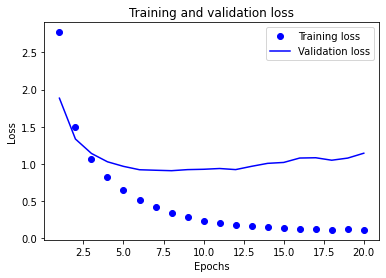

In [15]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

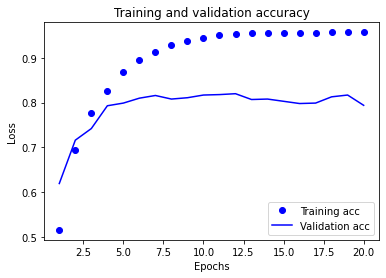

In [16]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 65ms/step - loss: 3.2469 - accuracy: 0.4060 - val_loss: 1.8100 - val_accuracy: 0.6730
Epoch 2/9
16/16 [==============================] - 1s 45ms/step - loss: 1.5633 - accuracy: 0.7012 - val_loss: 1.2881 - val_accuracy: 0.7200
Epoch 3/9
16/16 [==============================] - 1s 44ms/step - loss: 1.0543 - accuracy: 0.7751 - val_loss: 1.1225 - val_accuracy: 0.7560
Epoch 4/9
16/16 [==============================] - 1s 42ms/step - loss: 0.8158 - accuracy: 0.8271 - val_loss: 1.0173 - val_accuracy: 0.8020
Epoch 5/9
16/16 [==============================] - 1s 44ms/step - loss: 0.6478 - accuracy: 0.8676 - val_loss: 0.9494 - val_accuracy: 0.7970
Epoch 6/9
16/16 [==============================] - 1s 43ms/step - loss: 0.5233 - accuracy: 0.8927 - val_loss: 0.9022 - val_accuracy: 0.8140
Epoch 7/9
16/16 [==============================] - 1s 43ms/step - loss: 0.4174 - accuracy: 0.9160 - val_loss: 0.8894 - val_accuracy: 0.8210
Epoch 8/9
16/16 [===

In [18]:
results

[1.0162211656570435, 0.7813891172409058]

In [19]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18388245770258238

In [20]:
predictions = model.predict(x_test)

In [21]:
predictions[0].shape

(46,)

In [22]:
np.sum(predictions[0])

0.99999994

In [23]:
np.argmax(predictions[0])

3

In [25]:
predictions[0]

array([6.8648427e-05, 4.9767732e-05, 1.8113060e-05, 5.5399281e-01,
       4.0420097e-01, 9.0430323e-05, 1.2120607e-04, 2.3841978e-05,
       1.5086958e-02, 1.7493376e-05, 8.7201348e-05, 3.5293992e-03,
       1.4019792e-04, 2.1931504e-04, 9.7573655e-05, 3.4682512e-06,
       7.6762371e-04, 1.8336694e-03, 3.9427567e-04, 1.9233164e-03,
       7.2061876e-03, 1.6933386e-03, 1.1899153e-05, 5.3297164e-04,
       1.0396660e-04, 7.7123907e-05, 8.0428897e-08, 4.1857467e-05,
       5.3034519e-06, 1.5698243e-03, 3.7530132e-04, 1.5301016e-04,
       8.7420427e-05, 4.8172963e-04, 2.0653979e-04, 1.4449180e-04,
       1.2895085e-04, 1.8258177e-04, 2.8357704e-04, 2.7799341e-03,
       5.9970520e-05, 1.4855959e-04, 1.6084943e-05, 1.0266422e-03,
       5.8838154e-06, 1.0486875e-05], dtype=float32)